In [18]:
import pandas as pd
from binance.client import Client

In [20]:
%run ../Binance_keys.ipynb

In [21]:
client = Client(api_key,api_secret)

In [22]:
pd.DataFrame(client.get_historical_klines('BTCBUSD','1m', '30 min ago UTC'))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1638775320000,48216.68000000,48278.31000000,48211.98000000,48245.21000000,10.57948000,1638775379999,510460.87464690,379,8.06184000,389012.61199200,0
1,1638775380000,48244.87000000,48272.95000000,48148.44000000,48148.44000000,17.52146000,1638775439999,844886.96161130,486,10.76568000,519139.38830250,0
2,1638775440000,48147.90000000,48198.22000000,48113.14000000,48113.14000000,18.12375000,1638775499999,872818.08206900,600,10.74810000,517705.93129540,0
3,1638775500000,48115.84000000,48176.64000000,48060.61000000,48116.18000000,23.53403000,1638775559999,1132385.46418980,722,13.97142000,672369.31783800,0
4,1638775560000,48111.75000000,48126.04000000,47960.66000000,47992.87000000,36.18791000,1638775619999,1738043.98610590,1381,13.00239000,624651.96775810,0
5,1638775620000,47992.88000000,48004.44000000,47900.00000000,47965.93000000,39.27917000,1638775679999,1883187.20616420,1073,24.87006000,1192486.65578100,0
6,1638775680000,47965.93000000,48010.19000000,47865.21000000,47885.05000000,20.28096000,1638775739999,972615.92720340,716,11.35966000,544901.38197760,0
7,1638775740000,47885.13000000,47909.08000000,47800.54000000,47880.56000000,24.45376000,1638775799999,1170423.86607580,1068,14.96169000,716202.61255640,0
8,1638775800000,47880.54000000,48028.27000000,47830.82000000,47976.69000000,24.45852000,1638775859999,1173027.36868450,920,15.30848000,734257.72470960,0
9,1638775860000,47965.18000000,48042.40000000,47900.00000000,48030.16000000,14.05427000,1638775919999,674209.55234270,660,8.73020000,418864.84118690,0


In [23]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+' min ago UTC'))
    #six columns
    frame = frame.iloc[:,:6]
    #rename columns
    frame.columns = ['Time', 'Open','High','Low','Close','Volume']
    #set index to time
    frame = frame.set_index('Time')
    #readable timestamp
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [24]:
test = getminutedata('BTCBUSD', '1m', '30')

<AxesSubplot:xlabel='Time'>

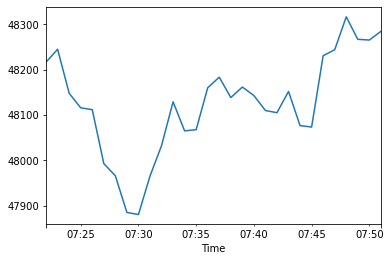

In [25]:
test.Open.plot()

In [26]:
#strategy
#buy if btc falls by more than 0.2% within last 30min
#sell if btc rises by more than 0.2% or falls further by 0.15%

In [27]:
def strategytest(symbol,qty, entried=False):
    df = getminutedata(symbol,'1m','30m')
    cumulret = (df.Open.pct_change() +1).cumprod() - 1
    if not entried:
        if cumulret[-1] < -0.002:
            order = client.create_order(symbol=symbol,
                                        side='BUY', type='MARKET',
                                        quantity=qty)
            print(order)
            entried=True
        else:
            print('No Trade has been executed')
    if entried:
        while True:
            df = getminutedata(symbol, '1m', '30m')
            sincebuy = df.loc[df.index > pd.to_datetime(
                order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() -1
                if sincebuyret[-1] > 0.002 or sincebuyret[-1] < -0.0015:
                    order = client.create_order(symbol=symbol,
                                                side='SELL', type='MARKET',
                                                quantity=qty)
                    print(order)
                    break
        

In [29]:
strategytest('BTCBUSD', 0.00001)

No Trade has been executed
